# Procedimientos para usar este Notebook

- Instalar [Anaconda](https://www.anaconda.com/)
- Abrir el prompt de Anaconda, dirigirse al directorio de trabajo y activar el entorno virtual:

    `conda env create -f entorno_SIMCA.yml`
        
    `conda activate entorno_SIMCA`


- Una vez activado el entorno, ejecutar el siguiente comando en el prompt:

    `jupyter notebook`

Ejecutar la siguiente celda para crear directorio para datos custom:

In [1]:
#crear directorio Custom  
import os
if not os.path.exists("Custom"):
    os.makedirs("Custom")

# Códigos 

Códigos que ejecutan los diferentes móludos de SIMCA por medio de la API https://apiprocess.ihcantabria.com/chambo-apiprocess y devuelven las tablas con resultados.

In [19]:
import json
import pandas as pd     
import requests    
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def MELCA(sub_catchment_id,initial_date,final_date,series,global_tau,snow_par):

    url = "https://apiprocessdev.ihcantabria.com/chambo-apiprocess/CHAMBO Models/SAJA_BESAYA"


    param = {
            "sub-catchment id": sub_catchment_id,
            "initial date": initial_date,
            "final date": final_date,
            "series":series,
            "global_tau":global_tau,
            "snow":snow_par
            }    

    print('Runing MELCA ...')

    post_np=requests.post(url,  json =param)     
    result=pd.DataFrame(json.loads(post_np.text))

    print('Writing tables ...')
    
    if series:
        result.to_csv("Quality_series.csv")
    else:
        result.to_csv("MELCA_Output.csv")  
    
    return result

In [24]:
#Parámetros
sub_catchment_id=1 
initial_date="00-01-01"
final_date="19-31-12"
global_tau=20
snow=False

# Módulo MELCA

In [25]:
Resultados_tramos=MELCA(sub_catchment_id,initial_date,final_date,False,global_tau,snow)
print('Finished')

Runing MELCA ...
Writing tables ...
Finished


### Resultados por tramos:

In [26]:
Resultados_tramos

,area,area_ac,ce_ac,id,petmed,petmed_ac,precmed,precmed_ac,q20_ac,q50_ac,q80_ac,qmed,qmed_ac,qmed_ac_inst,qrmed_ac,smax,tau_tramos
0,20.65,1024.72,0.521664,1,1140.503002,1170.469626,1426.718618,1400.873819,3.567531,9.929130,29.583512,0.495812,23.729623,23.728777,23.246040,94.536271,53.970379
1,24.65,1004.07,0.521466,2,1155.888148,1171.085929,1418.350301,1400.342288,3.489507,9.732179,28.922108,0.576473,23.233811,23.232987,22.767266,108.437085,19.314803
2,15.12,974.34,0.521524,3,1232.473882,1171.732896,1416.974138,1400.098245,3.349981,9.440863,27.954189,0.344303,22.544429,22.543634,22.113222,98.132814,16.200591
3,19.96,475.47,0.526726,4,1203.689600,1203.261182,1445.200076,1444.052185,1.700874,4.797286,14.124270,0.475022,11.460053,11.459656,11.228839,102.820311,7.112691
4,5.08,5.08,0.515827,5,1120.743345,1120.743345,1359.768050,1359.768050,0.016432,0.043531,0.139631,0.112909,0.112909,0.112905,0.112909,119.294433,3.751129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,8.78,8.78,0.514268,57,1094.562920,1094.562920,1320.330389,1320.330389,0.028519,0.092302,0.255085,0.188913,0.188913,0.188909,0.188913,142.463175,2.375006
57,13.30,41.58,0.478318,58,1097.768205,1109.008055,1189.818277,1148.564042,0.082100,0.317070,0.961296,0.247485,0.723856,0.723837,0.723519,111.588953,5.540312
58,9.34,9.34,0.482994,59,1106.895657,1106.895657,1190.992177,1190.992177,0.022138,0.079605,0.229193,0.170252,0.170252,0.170248,0.170252,130.017236,2.271629
59,20.53,20.53,0.515970,60,1048.684616,1048.684616,1249.001063,1249.001063,0.059110,0.194380,0.560237,0.419249,0.419249,0.419237,0.419249,120.416293,8.737719


### Series temporales:

In [27]:
global_tau=0.1
Saja_series=MELCA(sub_catchment_id,initial_date,final_date,True,global_tau,snow)
print('Finished')

Runing MELCA ...
Writing tables ...
Finished


In [17]:
Saja_series

,qinst,qinst_ac,qr,qsim,qsim_ac
0,0.419744,19.798102,19.798102,0.419744,19.798102
1,0.299009,14.562246,18.654409,0.368559,17.303536
2,0.211267,11.307558,15.685485,0.250430,12.879783
3,0.163202,9.372496,12.551373,0.185345,10.312064
4,0.132140,7.887467,10.170632,0.146831,8.620973
...,...,...,...,...,...
7300,0.164178,11.618470,14.594396,0.177583,12.513094
7301,0.143323,10.224925,12.421913,0.153349,10.913436
7302,0.127053,9.119436,10.814357,0.134935,9.666520
7303,0.113733,8.220006,9.570955,0.120229,8.665670


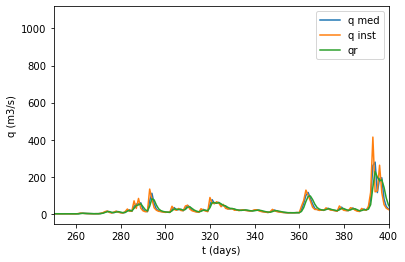

In [18]:
plt.plot(Saja_series['qsim_ac'])
plt.plot(Saja_series['qinst_ac'])
plt.plot(Saja_series['qr'])
plt.xlim([250, 400])

plt.xlabel('t (days)')
plt.ylabel('q (m3/s)')
plt.legend(['q med','q inst','qr'])
